### Set up

In [1]:
import sklearn
import numpy as np
import os

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Get Data

In [2]:
import os
import urllib

DOWNLOAD_ROOT = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
WINE_PATH = os.path.join("datasets", "wines")
REDWINE_FILE = "winequality-red.csv"
WHITEWINE_FILE = "winequality-white.csv"
REDWINE_URL = DOWNLOAD_ROOT + REDWINE_FILE
WHITEWINE_URL = DOWNLOAD_ROOT + WHITEWINE_FILE
# This function creates a dataset/wines directory, downloads the winequality-red.csv and winequality-white.csv file
def fetch_wine_data(whitewine_url=WHITEWINE_URL, redwine_url_url=REDWINE_URL, wine_path=WINE_PATH, redwine_file=REDWINE_FILE, whitewine_file=WHITEWINE_FILE):
    if not os.path.isdir(wine_path):
        os.makedirs(wine_path)
    red_path = os.path.join(wine_path, redwine_file)
    white_path = os.path.join(wine_path, whitewine_file)
    urllib.request.urlretrieve(whitewine_url, white_path)
    urllib.request.urlretrieve(redwine_url_url, red_path)

In [3]:
# Download the dataset
fetch_wine_data()

### Load Data

In [4]:
import pandas as pd
# Loads the dataset from the csv file and returns a pandas DataFrame object.
def load_wine_data(wine_file, wine_path=WINE_PATH):
    csv_path = os.path.join(wine_path, wine_file)
    return pd.read_csv(csv_path,sep=";")

In [5]:
# load the dataset
whitewine = load_wine_data(wine_file=WHITEWINE_FILE)
# load the dataset
redwine = load_wine_data(wine_file=REDWINE_FILE)

In [6]:
# Display five rows
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# Display five rows
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# check for null values
redwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# display info of variable
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
# display statistics and its chemicals
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0.5, 1.0, 'Correlation between variables')

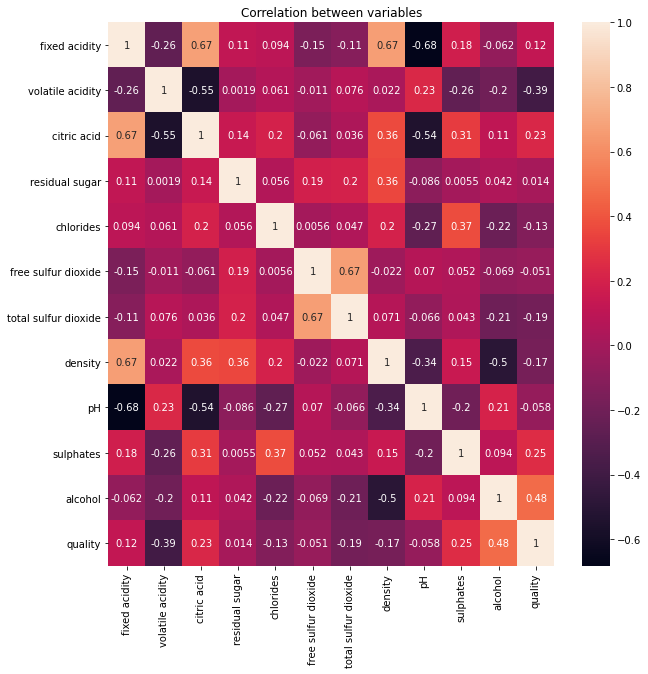

In [11]:
import seaborn as sns
corr = redwine.corr()
fig, ax = plt.subplots(figsize = (10,10))
g= sns.heatmap(corr,ax=ax, annot= True)
ax.set_title('Correlation between variables')

#### Data Preparation

In [12]:
# Split the dataset into training set and test set.
from sklearn.model_selection import train_test_split

red_train_set, red_test_set  = train_test_split(redwine, test_size=0.2, random_state=40)

white_train_set, white_test_set  = train_test_split (whitewine, test_size=0.2, random_state=40)

red_train_labels = red_train_set["quality"].copy()
red_test_labels = red_test_set["quality"].copy()
red_train_set = red_train_set.drop("quality", axis=1)
red_test_set = red_test_set.drop("quality", axis=1)
white_train_labels = white_train_set["quality"].copy()
white_test_labels = white_test_set["quality"].copy()
white_train_set = white_train_set.drop("quality", axis=1)
white_test_set = white_test_set.drop("quality", axis=1)

#### Feature scaling

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scale_dataset(dataset):
    scaler = StandardScaler()

    dataset_scaled = scaler.fit_transform(dataset)
    return dataset_scaled


#### Training

#### Gradient boosting

In [14]:
# gradient boosting ensemble for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


#### Redwine model

In [15]:
# define the model
params = {'n_estimators' : 3, 'max_depth': 3, 'learning_rate': 1, 'criterion': 'mse'}
GBR_redwine_model = GradientBoostingRegressor(**params)
GBR_redwine_model.fit(scale_dataset(dataset=red_train_set),red_train_labels)

mse = mean_squared_error(red_test_labels,GBR_redwine_model.predict(scale_dataset(dataset=red_test_set)))
score = GBR_redwine_model.score(scale_dataset(dataset=red_train_set), red_train_labels)
print("The mean squared error on test set", mse)
print("score", score)

redwine_predictions = GBR_redwine_model.predict(scale_dataset(dataset=red_train_set))
redwine_errors = abs(redwine_predictions - red_train_labels)
print('Mean Absolute Error:', round(np.mean(redwine_errors), 2), 'degrees.')
mape = 100 * (redwine_errors / red_train_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

The mean squared error on test set 0.4644631189091095
score 0.4272736304711203
Mean Absolute Error: 0.48 degrees.
Accuracy: 91.28 %.


#### Whitewine model

In [16]:
# define the model
params = {'n_estimators' : 3, 'max_depth': 3, 'learning_rate': 1, 'criterion': 'mse'}
GBR_whitewine_model = GradientBoostingRegressor(**params)
GBR_whitewine_model.fit(scale_dataset(dataset=white_train_set),white_train_labels)

mse = mean_squared_error(white_test_labels,GBR_whitewine_model.predict(scale_dataset(dataset=white_test_set)))
score = GBR_whitewine_model.score(scale_dataset(dataset=white_train_set), white_train_labels)
print("The mean squared error on test set", mse)
print("score", score)

whitewine_predictions = GBR_whitewine_model.predict(scale_dataset(dataset=white_train_set))
whitewine_errors = abs(whitewine_predictions - white_train_labels)
print('Mean Absolute Error:', round(np.mean(whitewine_errors), 2), 'degrees.')
mape = 100 * (whitewine_errors / white_train_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

The mean squared error on test set 0.5375512136277695
score 0.3522958517093766
Mean Absolute Error: 0.57 degrees.
Accuracy: 89.94 %.


#### Fine tune Red Wine

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [500, 1000, 1500], 'max_features': [5, 10],'max_depth': [10, 50, None]}]


grid_search_GBR = GridSearchCV(GBR_redwine_model, param_grid,cv=3, scoring='neg_mean_squared_error' ,n_jobs=-1)
grid_search_GBR.fit(scale_dataset(dataset=red_train_set), red_train_labels)

grid_best = grid_search_GBR.best_estimator_.predict(scale_dataset(dataset=red_train_set))
errors = abs(grid_best - red_train_labels)

mape = np.mean(100 * (errors / red_train_labels))

accuracy = 100 - mape  

print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')
grid_search_GBR.best_estimator_

The best model from grid-search has an accuracy of 100.0 %


GradientBoostingRegressor(criterion='mse', learning_rate=1, max_depth=None,
                          max_features=5, n_estimators=1000)

In [18]:
GBR_redwine_model = grid_search_GBR.best_estimator_

# make gradient boosting predictions
GBR_redwine_model_predictions = GBR_redwine_model.predict(scale_dataset(dataset=red_train_set))
GBR_redwine_model_errors = abs(GBR_redwine_model_predictions - red_train_labels)
print('Mean Absolute Error:', round(np.mean(GBR_redwine_model_errors), 2), 'degrees.')
mape = 100 * (GBR_redwine_model_errors / red_train_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.0 degrees.
Accuracy: 100.0 %.


#### Fine tune White Wine

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [500, 1000, 1500], 'max_features': [5, 10],'max_depth': [10, 50, None]}]


grid_search_GBR = GridSearchCV(GBR_whitewine_model, param_grid,cv=3, scoring='neg_mean_squared_error' ,n_jobs=-1)
grid_search_GBR.fit(scale_dataset(dataset=white_train_set), white_train_labels)

grid_best = grid_search_GBR.best_estimator_.predict(scale_dataset(dataset=white_train_set))
errors = abs(grid_best - white_train_labels)

mape = np.mean(100 * (errors / white_train_labels))

accuracy = 100 - mape  

print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')
grid_search_GBR.best_estimator_

The best model from grid-search has an accuracy of 100.0 %


GradientBoostingRegressor(criterion='mse', learning_rate=1, max_depth=50,
                          max_features=5, n_estimators=1000)

In [20]:
# make gradient boosting predictions
GBR_whitewine_model = grid_search_GBR.best_estimator_

GBR_model = grid_search_GBR.best_estimator_
GBR_whitewine_model_predictions = GBR_whitewine_model.predict(scale_dataset(dataset=white_train_set))
GBR_whitewine_model_errors = abs(GBR_whitewine_model_predictions - white_train_labels)
print('Mean Absolute Error:', round(np.mean(GBR_whitewine_model_errors), 2), 'degrees.')
mape = 100 * (GBR_whitewine_model_errors / white_train_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.0 degrees.
Accuracy: 100.0 %.


#### Evaluation for redwine

In [21]:
# make gradient boosting predictions
GBR_redwine_model_predictions = GBR_redwine_model.predict(scale_dataset(dataset=red_test_set))
GBR_redwine_model_errors = abs(GBR_redwine_model_predictions - red_test_labels)
print('Mean Absolute Error:', round(np.mean(GBR_redwine_model_errors), 2), 'degrees.')
mape = 100 * (GBR_redwine_model_errors / red_test_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.48 degrees.
Accuracy: 91.26 %.


#### Evaluation for whitewine

In [22]:
# make gradient boosting predictions
GBR_whitewine_model_predictions = GBR_whitewine_model.predict(scale_dataset(dataset=white_test_set))
GBR_whitewine_model_errors = abs(GBR_whitewine_model_predictions - white_test_labels)
print('Mean Absolute Error:', round(np.mean(GBR_whitewine_model_errors), 2), 'degrees.')
mape = 100 * (GBR_whitewine_model_errors / white_test_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.53 degrees.
Accuracy: 90.6 %.
